Churn Data Results 

The churn dataset consists of rows= 5986 and columns= 22. The cleaning function in template is called to change columns to numeric, which are ["SeniorCitizen","tenure","MonthlyCharges","TotalCharges"]. The Total Charges column has missing values which are filled by linear interpolation and un-necessary columns are deleted.
•	The heatmap of correlation shows that the correlation among features is not so high.
•	t-stats for equality of mean of all numeric columns suggest that mean of numeric columns are not equal
•	The data of numeric columns is not normal.
The one hot encoding is applied to string columns to create dummies, except the churn column which results in 
Rows=5986, and columns= 45)

Label encoding is applied to churn column. template.apply_label_encoding(churndf, cols=['Churn'])
Machine Learning algorithms are applied in two stages.
1.	In the first sage the issue of class imbalance is not addressed. Eleven different machine learning classification algorithms are applied and four different scenarios are considered
a.	without focusing the cross validation (CV) and features selection.
b.	Only cross validation (CV: Stratified K-Fold) is considered
c.	Only feature selection (random forest based algorithm is used) criterion is considered
d.	Both cross validation (CV: Stratified K-Fold) and features selection (random forest based algorithm is used) are considered.
The results of this stage indicate that
•	With the application of CV the precision and accuracy increase in comparison to the bench mark category which is (without CV and RFFS)
•	The performance in terms all four criterions (precision, recall, AUC and accuracy) worsens with the application of features selection criterion in comparison to the benchmark category
•	The final Selected Features are =['tenure', 'MonthlyCharges', 'Contract_Month-to-month', 'Contract_Two year', 'OnlineSecurity_No']
•	With the application of both CV and RFFS criterions, almost all 11 algorithms outperform the benchmark and RFFS based strategies however, the results are not better than the only CV based strategy.
•	 The best performing algorithm seems to be the XGBoost and Adaboost. 

2.	In the second stage the class imbalance issue is resolved through SMOT oversampling (to increase the under sampled category which is stroke=1). The results show that 

Original data shape: (5986, 45)
Resampled data shape: (8798, 45)

The above four different scenarios are considered
a.	without focusing the cross validation (CV) and features selection.
b.	Only cross validation (CV: Stratified K-Fold) is considered
c.	Only feature selection (random forest based algorithm is used) criterion is considered
d.	Both cross validation (CV: Stratified K-Fold) and features selection (random forest based algorithm is used) are considered.
The results of this stage indicate that
•	With the application of CV the precision and accuracy increase in comparison to the bench mark category which is (without CV and RFFS)
•	The performance in terms all four criterions (precision, recall, AUC and accuracy) worsens a little bit with the application of features selection criterion in comparison to the benchmark category
•	Selected Features =['tenure', 'MonthlyCharges', 'Contract_Two year', 'Contract_One year', 'TechSupport_Yes', 'Contract_Month-to-month', 'PaperlessBilling_No']

•	With the application of both CV and RFFS criterions, almost all 11 algorithms underperform than the CV only based scenario but outperform the rest of two scenarios.
•	 The best performing algorithm seems to be the Random Forest.


Overall it seems that 
•	With the application of SMOT oversampling the performance improves in comparison to the strategy of without addressing the class imbalancing issue.
•	The Random forest outperforms all the remaining algorithms.


In [1]:
import TempML1 as template
from sklearn.model_selection import train_test_split

In [2]:
FILE_NAME = "churndata.csv"
LABEL_COL = "Churn"
churndf = template.load_data(FILE_NAME)
display(churndf.head())
print(churndf.shape)
print(churndf.dtypes)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


(5986, 22)
Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [3]:
churndf.isnull().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
churndf = template.cleaningup(churndf, to_numeric=["SeniorCitizen","tenure","MonthlyCharges","TotalCharges"], cols_to_interpolate=[], cols_to_delete=["Unnamed: 0","customerID"])

df is all cleaned up..


In [5]:
print(churndf.dtypes)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
Churn                object
dtype: object


Shape is:
 (5986, 19)

 Columns are:
 Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'Churn'],
      dtype='object')

 Types are:
 gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
Churn                object
dtype: object

 Statistical Analysis of Numerical Columns:
      

ValueError: num must be 1 <= num <= 8, not 9

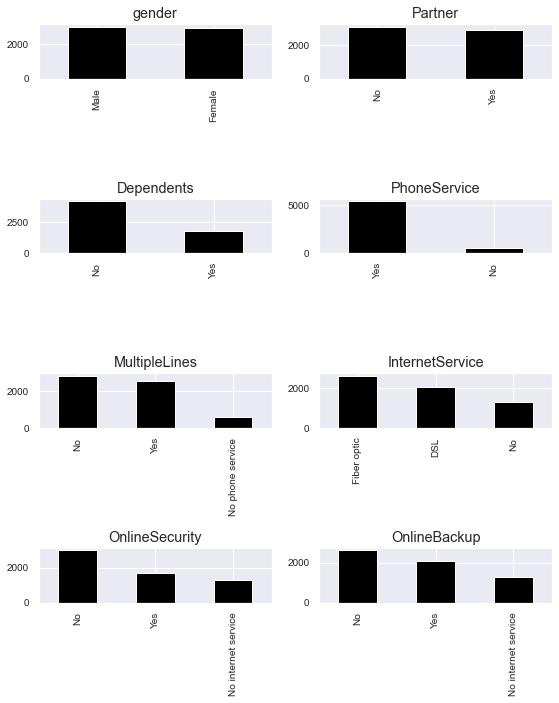

In [6]:
template.basicanalysis(churndf)
template.stringcolanalysis(churndf)
template.numcolanalysis(churndf)

In [7]:
churndf=template.apply_label_encoding(churndf, cols=['Churn'])

In [8]:
churndf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,0
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,0
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,1
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,0
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,1
5982,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,0
5983,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,0
5984,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1


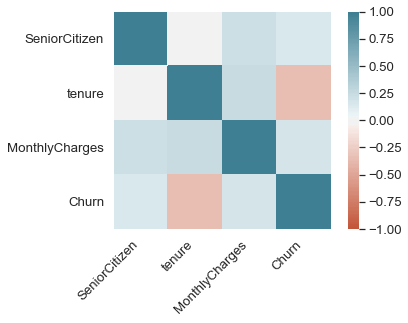

In [9]:
template.correlation_anlysis(churndf)

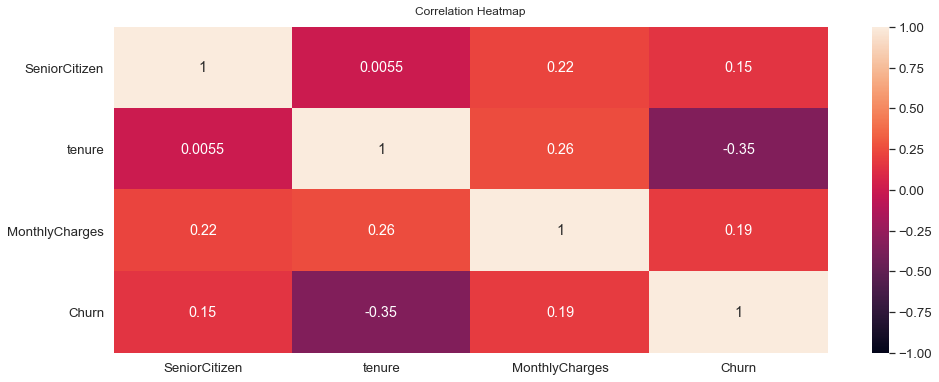

In [10]:
template.correlation(churndf)

In [11]:
template.t_test(churndf)


t-test for equality of mean between all numric columns
['SeniorCitizen', 'tenure', 'MonthlyCharges']
(SeniorCitizen,tenure) => t-value=-101.94471591064193, p-value=0.0
(SeniorCitizen,MonthlyCharges) => t-value=-166.05974055295823, p-value=0.0
(tenure,MonthlyCharges) => t-value=-64.42095600158622, p-value=0.0


In [12]:
template.Normality_test(churndf)


Normality Test for all numric columns
['SeniorCitizen', 'tenure', 'MonthlyCharges']
Normaility Test for Column: SeniorCitizen
Statistics=0.442, p_value=0.000
Sample does not look Gaussian (reject H0)
Normaility Test for Column: tenure
Statistics=0.905, p_value=0.000
Sample does not look Gaussian (reject H0)
Normaility Test for Column: MonthlyCharges
Statistics=0.921, p_value=0.000
Sample does not look Gaussian (reject H0)


In [13]:
template.ANOVA_analysis(churndf)


KeyError: "None of [Int64Index([0, 0, 1, 0, 0, 0, 0, 0, 0, 1,\n            ...\n            0, 1, 0, 0, 0, 0, 0, 0, 1, 0],\n           dtype='int64', length=5986)] are in the [columns]"

In [14]:
template.chisquare_test(churndf)

Chisquare-test for Independence between all numric columns
(SeniorCitizen,tenure) => chisqr-value=74.87983036427057, p-value=0.3850405784641637
Independent (H0 holds true)
(SeniorCitizen,MonthlyCharges) => chisqr-value=1945.7876747664236, p-value=1.069010672711686e-12
Dependent (reject H0)
(tenure,MonthlyCharges) => chisqr-value=113008.78033508014, p-value=5.87706126800887e-12
Dependent (reject H0)


In [15]:
churndf = template.onehotencoding(churndf)

In [16]:
churndf.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn', 'gender_Female',
       'gender_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No',
       'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'Paperle

In [17]:
churndf['Churn']

0       0
1       0
2       1
3       0
4       0
       ..
5981    1
5982    0
5983    0
5984    1
5985    0
Name: Churn, Length: 5986, dtype: int32

In [18]:
churndf.isnull().sum()

SeniorCitizen                              0
tenure                                     0
MonthlyCharges                             0
Churn                                      0
gender_Female                              0
gender_Male                                0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBack

# Transformation

In [ ]:
#churndf=template.MinMax_Transformation(churndf,'Churn')
#churndf=template.Standard_Transformation(churndf,'Churn')
churndf

# Without Addressing Class Imbalancing

In [20]:
#without REG, CV and RFFS and addressing class imbalancing
results_without_cv_reg_rffs= template.run_algorithms(churndf,"Churn")

============ LogReg ===========
Prediction Vector: 
 [1 0 1 ... 0 1 0]

 Accuracy: 
 79.79966611018364

 Precision of event Happening: 
 68.28358208955224

 Recall of event Happening: 
 53.8235294117647

 AUC: 
 0.7195838475250239

 F-Score:
 0.6019736842105263

 Confusion Matrix: 
 [[773  85]
 [157 183]]

============ KNN ===========
Prediction Vector: 
 [1 0 1 ... 0 1 1]

 Accuracy: 
 77.12854757929884

 Precision of event Happening: 
 61.458333333333336

 Recall of event Happening: 
 52.05882352941177

 AUC: 
 0.6956088029617441

 F-Score:
 0.5636942675159237

 Confusion Matrix: 
 [[747 111]
 [163 177]]

============ GadientBoosting ===========
Prediction Vector: 
 [1 0 1 ... 0 1 0]

 Accuracy: 
 79.88313856427379

 Precision of event Happening: 
 68.8212927756654

 Recall of event Happening: 
 53.23529411764706

 AUC: 
 0.7183909228026875

 F-Score:
 0.6003316749585406

 Confusion Matrix: 
 [[776  82]
 [159 181]]

============ AdaBoost ===========
Prediction Vector: 
 [1 0 1 ... 0 

In [21]:
#with CV and without addressing class imbalancing
results_cv = template.run_algorithms_cv(churndf,"Churn")

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1428, number of negative: 3959
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001551 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 412
[LightGBM] [Info] Number of data points in the train set: 5387, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265083 -> initscore=-1.019717
[LightGBM] [Info] Start training from score -1.019717
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1428, number of negative: 3959
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001963 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 412
[LightGBM] [Info] Number of data points in the train set: 5387, number of used f

[22:12:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:12:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1428, number of negative: 3959
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001542 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 412
[LightGBM] [Info] Number of data 

In [22]:
#with RFFS only and without addressing class imbalancing
res_rffs = template.MachineLearningwithRFFS(churndf,"Churn", threshold=3,
                                    algo_list=template.get_supported_algorithms())

tenure                                     18.969936
MonthlyCharges                             18.756975
Contract_Month-to-month                     5.083395
Contract_Two year                           3.860528
OnlineSecurity_No                           3.468817
InternetService_Fiber optic                 2.460405
PaymentMethod_Electronic check              2.378163
OnlineBackup_No                             2.260497
gender_Male                                 2.170554
SeniorCitizen                               2.121540
PaperlessBilling_Yes                        1.988469
gender_Female                               1.868199
PaperlessBilling_No                         1.755137
Partner_No                                  1.729713
Contract_One year                           1.718066
TechSupport_Yes                             1.698950
PaymentMethod_Credit card (automatic)       1.655844
Partner_Yes                                 1.644719
Dependents_No                               1.

In [23]:
#with CV and RFFS and without addressing class imbalancing
res_rffs_cv = template.MachineLearningwithRFFS_CV(churndf,"Churn", threshold=3,
                                    algo_list=template.get_supported_algorithms())

tenure                                     18.881704
MonthlyCharges                             18.384412
Contract_Month-to-month                     3.930834
PaymentMethod_Electronic check              3.603530
OnlineBackup_No                             3.186785
TechSupport_No                              3.055247
Contract_Two year                           2.897013
InternetService_Fiber optic                 2.529747
OnlineSecurity_No                           2.386870
SeniorCitizen                               2.384005
gender_Female                               2.268380
DeviceProtection_No                         2.263836
gender_Male                                 2.205164
PaperlessBilling_No                         2.134228
Partner_Yes                                 1.709797
OnlineSecurity_Yes                          1.676472
Contract_One year                           1.610750
MultipleLines_No                            1.609141
MultipleLines_Yes                           1.

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Nu

[22:14:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:14:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:14:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:14:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[LightGBM] [Info] Number of positive: 1428, number of negative: 3959
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 336
[LightGBM] [Info] Number of data points in the train set: 5387, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265083 -> initscore=-1.019717
[LightGBM] [Info] Start training from score -1.019717
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
============ LogReg ===========
{'accuracy': 79.33484458489903, 'precision': 63.59418448964218, 'recall': 51.54088050314465, 'auc_val': 0.704510677106736, 'f_score': 0.5689890

In [24]:
#all results without addressing class imbalancing
res_all=template.all_CImbalance(churndf,"Churn", algo_list=template.get_supported_algorithms(), threshold=3, feature_list=[]) 


Results without FS, REG and CV
============ LogReg ===========
Prediction Vector: 
 [1 0 1 ... 0 1 0]

 Accuracy: 
 79.79966611018364

 Precision of event Happening: 
 68.28358208955224

 Recall of event Happening: 
 53.8235294117647

 AUC: 
 0.7195838475250239

 F-Score:
 0.6019736842105263

 Confusion Matrix: 
 [[773  85]
 [157 183]]

============ KNN ===========
Prediction Vector: 
 [1 0 1 ... 0 1 1]

 Accuracy: 
 77.12854757929884

 Precision of event Happening: 
 61.458333333333336

 Recall of event Happening: 
 52.05882352941177

 AUC: 
 0.6956088029617441

 F-Score:
 0.5636942675159237

 Confusion Matrix: 
 [[747 111]
 [163 177]]

============ GadientBoosting ===========
Prediction Vector: 
 [1 0 1 ... 0 1 0]

 Accuracy: 
 79.88313856427379

 Precision of event Happening: 
 68.8212927756654

 Recall of event Happening: 
 53.23529411764706

 AUC: 
 0.7183909228026875

 F-Score:
 0.6003316749585406

 Confusion Matrix: 
 [[776  82]
 [159 181]]

============ AdaBoost ===========
Pre

Prediction Vector: 
 [1 0 1 ... 0 1 0]

 Accuracy: 
 76.71118530884809

 Precision of event Happening: 
 61.42322097378277

 Recall of event Happening: 
 48.23529411764706

 AUC: 
 0.6811531605649254

 F-Score:
 0.5403624382207578

 Confusion Matrix: 
 [[755 103]
 [176 164]]

============ GadientBoosting ===========
Prediction Vector: 
 [1 0 1 ... 0 1 0]

 Accuracy: 
 78.88146911519198

 Precision of event Happening: 
 67.90123456790124

 Recall of event Happening: 
 48.529411764705884

 AUC: 
 0.697192513368984

 F-Score:
 0.5660377358490567

 Confusion Matrix: 
 [[780  78]
 [175 165]]

============ AdaBoost ===========
Prediction Vector: 
 [1 0 1 ... 0 1 0]

 Accuracy: 
 78.63105175292154

 Precision of event Happening: 
 67.5

 Recall of event Happening: 
 47.647058823529406

 AUC: 
 0.6927807486631016

 F-Score:
 0.5586206896551724

 Confusion Matrix: 
 [[780  78]
 [178 162]]

============ SVM ===========
Prediction Vector: 
 [0 0 1 ... 0 1 0]

 Accuracy: 
 78.46410684474124

 Prec

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1429, number of negative: 3959
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002357 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 412
[LightGBM] [Info] Number of data points in the train set: 5388, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265219 -> initscore=-1.019017
[LightGBM] [Info] Start training from score -1.019017
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1429, number of negative: 3959
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001415 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 412
[LightGBM] [Info] Number of data points in the train set: 5388, number of used f

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1428, number of negative: 3959
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001545 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 412
[LightGBM] [Info] Number of data points in the train set: 5387, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265083 -> initscore=-1.019717
[LightGBM] [Info] Start training from score -1.019717
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1429, number of negative: 3959
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002263 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 412
[LightGBM] [Info] Number of data points in the train set: 5388, number of used f

[LightGBM] [Info] Number of positive: 1428, number of negative: 3959
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 330
[LightGBM] [Info] Number of data points in the train set: 5387, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265083 -> initscore=-1.019717
[LightGBM] [Info] Start training from score -1.019717
[LightGBM] [Info] Number of positive: 1428, number of negative: 3959
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 330
[LightGBM] [Info] Number of data points in the train set: 5387, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265083 -> initscore=-1.019717
[Light

[LightGBM] [Info] Number of positive: 1428, number of negative: 3959
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000413 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 330
[LightGBM] [Info] Number of data points in the train set: 5387, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265083 -> initscore=-1.019717
[LightGBM] [Info] Start training from score -1.019717
[LightGBM] [Info] Number of positive: 1428, number of negative: 3959
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 330
[LightGBM] [Info] Number of data points in the train set: 5387, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265083 -> initscore=-1.019717
[Light

TypeError: unhashable type: 'dict'

#  With Adressing Class Imbalancing

In [25]:
#deep copy
churndf_bal1 = churndf.copy()

In [26]:
churndf_bal=template.SMOT_OverSampling(churndf_bal1,"Churn")

In [27]:
print('Orignal data shape:', churndf.shape)
print('Resampled data shape:', churndf_bal.shape)



Orignal data shape: (5986, 45)
Resampled data shape: (8798, 45)


In [28]:
#without REG, CV and RFFS and with addressing class imbalancing
results_without_cv_rffs = template.run_algorithms(churndf_bal,"Churn")


============ LogReg ===========
Prediction Vector: 
 [0 0 1 ... 1 1 0]

 Accuracy: 
 83.97727272727272

 Precision of event Happening: 
 85.17200474495849

 Recall of event Happening: 
 82.05714285714286

 AUC: 
 0.8396642453591607

 F-Score:
 0.8358556461001164

 Confusion Matrix: 
 [[760 125]
 [157 718]]

============ KNN ===========
Prediction Vector: 
 [0 1 1 ... 1 1 0]

 Accuracy: 
 80.85227272727272

 Precision of event Happening: 
 75.42533081285444

 Recall of event Happening: 
 91.2

 AUC: 
 0.8091073446327685

 F-Score:
 0.825659596482152

 Confusion Matrix: 
 [[625 260]
 [ 77 798]]

============ GadientBoosting ===========
Prediction Vector: 
 [0 0 1 ... 1 1 0]

 Accuracy: 
 85.9090909090909

 Precision of event Happening: 
 85.5039637599094

 Recall of event Happening: 
 86.28571428571429

 AUC: 
 0.8591121872477805

 F-Score:
 0.8589306029579067

 Confusion Matrix: 
 [[757 128]
 [120 755]]

============ AdaBoost ===========
Prediction Vector: 
 [0 1 1 ... 1 1 0]

 Accuracy

In [29]:
#with CV only and with addressing class imbalancing
results_cv = template.run_algorithms_cv(churndf_bal,"Churn")


[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3959, number of negative: 3959
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 412
[LightGBM] [Info] Number of data points in the train set: 7918, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3959, number of negative: 3959
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000834 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 412
[LightG

[22:26:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3959, number of negative: 3959
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 412
[LightGBM] [Info] Number of data points in the train set: 7918, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of 

In [30]:
#with RFFS and with addressing class imbalancing
res_rffs = template.MachineLearningwithRFFS(churndf_bal,"Churn", threshold=3,
                                    algo_list=template.get_supported_algorithms())


tenure                                     15.839126
MonthlyCharges                             12.716963
Contract_Two year                           8.602325
Contract_One year                           4.545012
TechSupport_Yes                             3.870991
Contract_Month-to-month                     3.514295
PaperlessBilling_No                         3.208902
Dependents_Yes                              2.744490
OnlineSecurity_Yes                          2.697649
InternetService_Fiber optic                 2.521541
gender_Male                                 2.016974
Partner_Yes                                 1.950253
DeviceProtection_Yes                        1.888442
Partner_No                                  1.822096
OnlineBackup_Yes                            1.780603
gender_Female                               1.772812
PaymentMethod_Credit card (automatic)       1.723012
PaymentMethod_Bank transfer (automatic)     1.722352
PaperlessBilling_Yes                        1.

Prediction Vector: 
 [0. 1. 1. ... 1. 1. 1.]

 Accuracy: 
 79.43181818181819

 Precision of event Happening: 
 74.63976945244957

 Recall of event Happening: 
 88.8

 AUC: 
 0.7948474576271186

 F-Score:
 0.8110647181628393

 Confusion Matrix: 
 [[621 264]
 [ 98 777]]



In [31]:
#with CV and RFFS and with addressing class imbalancing
res_rffs_cv = template.MachineLearningwithRFFS_CV(churndf_bal,"Churn", threshold=3,
                                    algo_list=template.get_supported_algorithms())



tenure                                     13.541512
MonthlyCharges                             13.058656
Contract_Month-to-month                     5.805804
OnlineSecurity_No                           5.775249
PaperlessBilling_No                         4.499791
Contract_One year                           3.964695
OnlineSecurity_Yes                          3.680114
Contract_Two year                           3.210732
Partner_Yes                                 2.681092
PaymentMethod_Credit card (automatic)       2.246605
TechSupport_Yes                             2.233888
OnlineBackup_Yes                            2.180396
PaymentMethod_Bank transfer (automatic)     2.173260
PaperlessBilling_Yes                        1.894088
Partner_No                                  1.761447
Dependents_Yes                              1.729577
gender_Female                               1.729218
DeviceProtection_No internet service        1.697240
gender_Male                                 1.

[22:29:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:29:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:29:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:29:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [32]:
#all results and with addressing class imbalancing
res_all=template.all_CImbalance(churndf_bal,"Churn", algo_list=template.get_supported_algorithms(),
                                threshold=5, feature_list=[]) 


Results without FS, REG and CV
============ LogReg ===========
Prediction Vector: 
 [0 0 1 ... 1 1 0]

 Accuracy: 
 83.97727272727272

 Precision of event Happening: 
 85.17200474495849

 Recall of event Happening: 
 82.05714285714286

 AUC: 
 0.8396642453591607

 F-Score:
 0.8358556461001164

 Confusion Matrix: 
 [[760 125]
 [157 718]]

============ KNN ===========
Prediction Vector: 
 [0 1 1 ... 1 1 0]

 Accuracy: 
 80.85227272727272

 Precision of event Happening: 
 75.42533081285444

 Recall of event Happening: 
 91.2

 AUC: 
 0.8091073446327685

 F-Score:
 0.825659596482152

 Confusion Matrix: 
 [[625 260]
 [ 77 798]]

============ GadientBoosting ===========
Prediction Vector: 
 [0 0 1 ... 1 1 0]

 Accuracy: 
 85.9090909090909

 Precision of event Happening: 
 85.5039637599094

 Recall of event Happening: 
 86.28571428571429

 AUC: 
 0.8591121872477805

 F-Score:
 0.8589306029579067

 Confusion Matrix: 
 [[757 128]
 [120 755]]

============ AdaBoost ===========
Prediction Vector:

Prediction Vector: 
 [0 1 1 ... 1 1 0]

 Accuracy: 
 77.38636363636363

 Precision of event Happening: 
 74.31192660550458

 Recall of event Happening: 
 83.31428571428572

 AUC: 
 0.7741985472154964

 F-Score:
 0.7855603448275862

 Confusion Matrix: 
 [[633 252]
 [146 729]]

============ GadientBoosting ===========
Prediction Vector: 
 [0 1 0 ... 1 1 0]

 Accuracy: 
 77.89772727272727

 Precision of event Happening: 
 76.64473684210526

 Recall of event Happening: 
 79.88571428571429

 AUC: 
 0.779089588377724

 F-Score:
 0.7823167319529938

 Confusion Matrix: 
 [[672 213]
 [176 699]]

============ AdaBoost ===========
Prediction Vector: 
 [0 1 0 ... 1 1 0]

 Accuracy: 
 77.5

 Precision of event Happening: 
 75.18401682439537

 Recall of event Happening: 
 81.71428571428572

 AUC: 
 0.7752380952380953

 F-Score:
 0.7831325301204819

 Confusion Matrix: 
 [[649 236]
 [160 715]]

============ SVM ===========
Prediction Vector: 
 [0 1 0 ... 1 1 0]

 Accuracy: 
 74.48863636363636

 Precis

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3959, number of negative: 3959
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 412
[LightGBM] [Info] Number of data points in the train set: 7918, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3959, number of negative: 3959
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002333 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 412
[LightGBM] [Info] Number of data points in the train set: 7918, number 

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3959, number of negative: 3959
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000982 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 412
[LightGBM] [Info] Number of data points in the train set: 7918, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3959, number of negative: 3959
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 412
[LightGBM] [Info] Number of data points in the train set: 7918, number 

You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 330
[LightGBM] [Info] Number of data points in the train set: 7918, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 3959, number of negative: 3959
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 330
[LightGBM] [Info] Number of data points in the train set: 7918, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 3959, number of negative: 3959
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And 

[LightGBM] [Info] Number of positive: 3959, number of negative: 3959
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 330
[LightGBM] [Info] Number of data points in the train set: 7918, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 3959, number of negative: 3959
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000261 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 330
[LightGBM] [Info] Number of data points in the train set: 7918, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.00000

TypeError: unhashable type: 'dict'